In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import sys
sys.path.append("../scripts")

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
plt.rcParams["figure.figsize"] = (14,6)

In [63]:
obs = pd.read_hdf("../data/ts-covid.hdf", key="Argentina")
obs

,C,D,I,R
date,,,,
2020-01-28,0,0,0,0
2020-01-29,0,0,0,0
2020-01-30,0,0,0,0
2020-01-31,0,0,0,0
2020-02-01,0,0,0,0
...,...,...,...,...
2020-06-05,18471,573,12279,5618
2020-06-06,19301,590,12892,5817
2020-06-07,20150,608,13499,6042


In [64]:
obs = obs[["I", "R", "D"]]
obs = obs["2020-03-07":]
obs

,I,R,D
date,,,
2020-03-07,1,0,0
2020-03-08,3,0,0
2020-03-09,5,0,0
2020-03-10,7,0,0
2020-03-11,9,0,0
...,...,...,...
2020-06-05,12279,5618,573
2020-06-06,12892,5817,590
2020-06-07,13499,6042,608


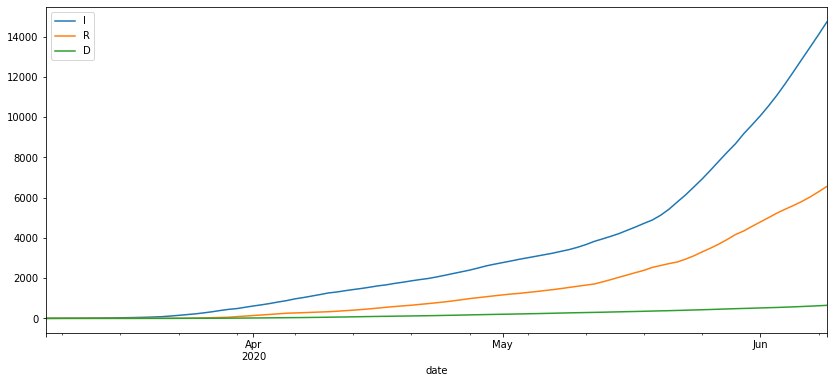

In [65]:
obs.plot()

In [66]:
train = obs.iloc[:-15]
test = obs.iloc[-15:]

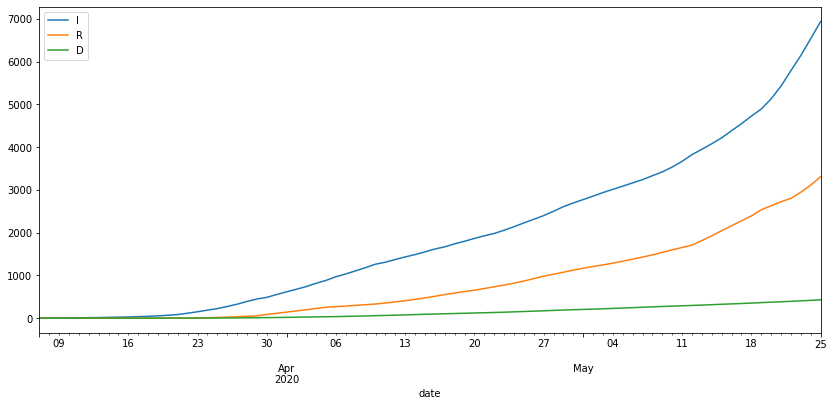

In [67]:
train.plot()

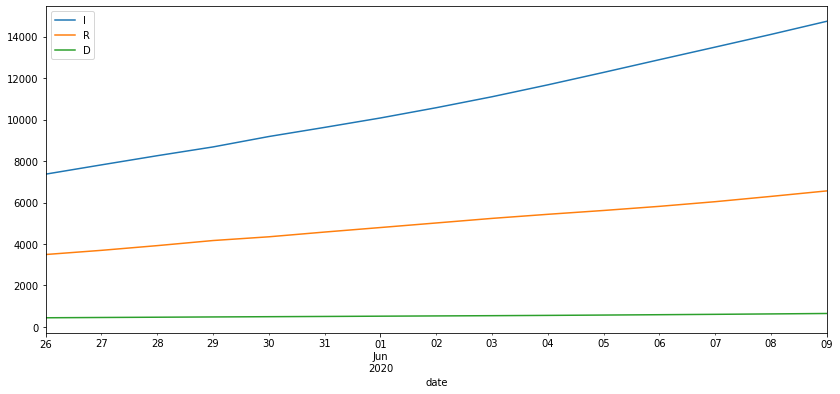

In [68]:
test.plot()

# Piecewise SIR

In [69]:
from SEIR import SIR

In [70]:
init_I, init_R, init_D = train.iloc[0, :]

In [71]:
model = SIR(population = 1e6, init_infected=init_I, init_recovered=init_R, init_dead=init_D)

In [72]:
model.fit_piecewise(train, estimate=('r_transmission', "r_recovery", "r_mortality", "population"), batch_size=7, keep_remainder=True)

----------------------
Batch 0

Fitting...
Simulating...
Done!
----------------------
Batch 1

Fitting...
Simulating...
Done!
----------------------
Batch 2

Fitting...
Simulating...
Done!
----------------------
Batch 3

Fitting...
Simulating...
Done!
----------------------
Batch 4

Fitting...
Simulating...
Done!
----------------------
Batch 5

Fitting...
Simulating...
Done!
----------------------
Batch 6

Fitting...
Simulating...
Done!
----------------------
Batch 7

Fitting...
Simulating...
Done!
----------------------
Batch 8

Fitting...
Simulating...
Done!
----------------------
Batch 9

Fitting...
Simulating...
Done!
----------------------
Batch 10

Fitting...
Simulating...
Done!


In [73]:
pred = model.simulate(len(test))
pred.index = test.index

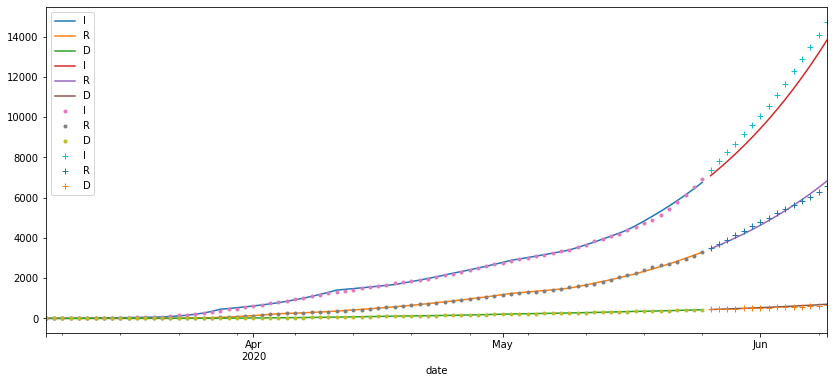

In [74]:
ax = model.y_fit.plot()
pred.plot(ax=ax)
train.plot(ax=ax, style=".")
test.plot(ax=ax, style="+")

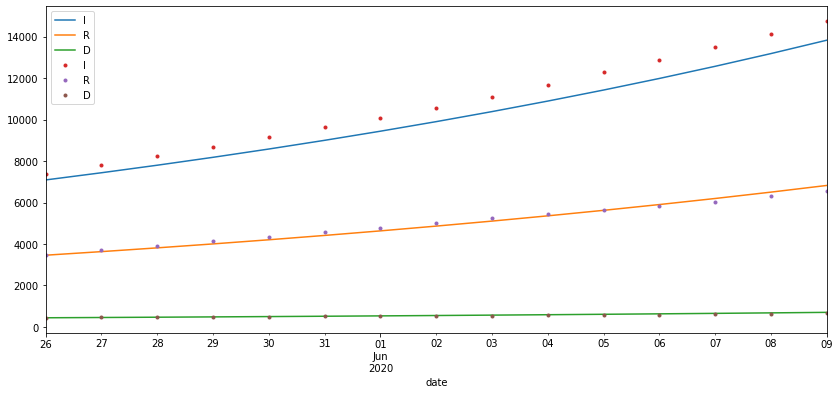

In [75]:
ax = pred.plot()
test.plot(ax=ax, style=".")

In [76]:
model.piecewise_params

,population,r_transmission,r_recovery,r_mortality
0,-8.277008e+10,0.490419,5.281458e-07,0.019334
1,1.089527e+15,0.148498,6.120022e-03,0.002851
2,1.165252e+15,0.297271,3.014576e-02,0.003876
3,1.072207e+15,0.127210,4.399186e-02,0.005545
4,1.729597e+15,0.105954,1.757783e-02,0.004321
5,1.975373e+15,0.049880,1.973386e-02,0.004520
6,2.085789e+15,0.065801,2.158964e-02,0.002998
7,2.027222e+15,0.060259,2.073092e-02,0.003693
8,3.020701e+15,0.037594,1.196190e-02,0.002312
9,-1.483411e+14,0.061990,2.260520e-02,0.002502


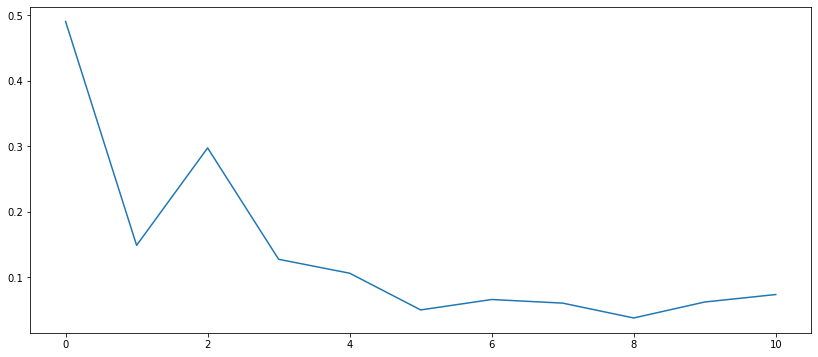

In [77]:
model.piecewise_params.r_transmission.plot()

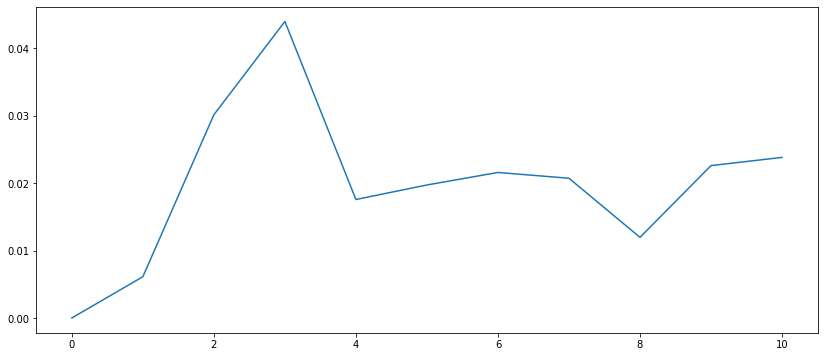

In [78]:
model.piecewise_params.r_recovery.plot()

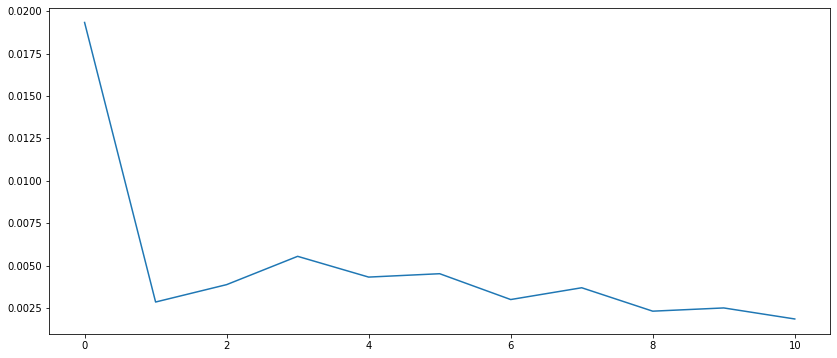

In [79]:
model.piecewise_params.r_mortality.plot()

# Piecewise SEIR

In [80]:
from SEIR import SEIR

In [81]:
init_I, init_R, init_D = train.iloc[0, :]

In [82]:
train.head()

,I,R,D
date,,,
2020-03-07,1,0,0
2020-03-08,3,0,0
2020-03-09,5,0,0
2020-03-10,7,0,0
2020-03-11,9,0,0


In [83]:
model = SEIR(population=1e4, init_exposed=1, init_infected=init_I, init_recovered=init_R, init_dead=init_D)

In [84]:
model.fit_piecewise(train, estimate=('r_transmission', "r_recovery", "r_mortality", "r_progression", "population"), 
                    batch_size=10, keep_remainder=True)

----------------------
Batch 0

Fitting...
Simulating...
Done!
----------------------
Batch 1

Fitting...
Simulating...
Done!
----------------------
Batch 2

Fitting...
Simulating...
Done!
----------------------
Batch 3

Fitting...
Simulating...
Done!
----------------------
Batch 4

Fitting...
Simulating...
Done!
----------------------
Batch 5

Fitting...
Simulating...
Done!
----------------------
Batch 6

Fitting...
Simulating...
Done!
----------------------
Batch 7

Fitting...
Simulating...
Done!


In [85]:
pred = model.simulate(len(test))
pred.index = test.index

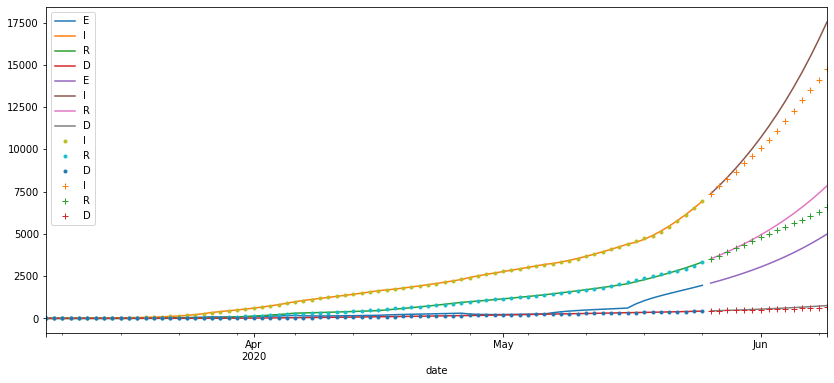

In [86]:
ax = model.y_fit.plot()
pred.plot(ax=ax)
train.plot(ax=ax, style=".")
test.plot(ax=ax, style="+")